In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.ticker as tkr

df = pd.read_csv('./Resources/bigCleanData.csv')
df.head()

,Origin Airport,Origin City,Origin Population,Destination Airport,Destination City,Destination Population,Distance,Flights,Passangers,Seats,Percent Full,Fly Date,Month,Year
0,MHK,"Manhattan, KS",122049,AMW,"Ames, IA",86219,254.0,1,21,30,0.70,200810,10,2008
1,EUG,"Eugene, OR",284093,RDM,"Bend, OR",76034,103.0,22,41,396,0.10,199011,11,1990
2,EUG,"Eugene, OR",284093,RDM,"Bend, OR",76034,103.0,19,88,342,0.26,199012,12,1990
3,EUG,"Eugene, OR",284093,RDM,"Bend, OR",76034,103.0,4,11,72,0.15,199010,10,1990
4,MFR,"Medford, OR",147300,RDM,"Bend, OR",76034,156.0,1,0,18,0.00,199002,2,1990


In [59]:
def numfmt(x, pos):
    s = '{}'.format(x/10000.0)
    return s

In [60]:
df.rename(columns = {'Passangers' : 'Passengers'}, inplace=True)

In [61]:
# Remove where two columns are equal, this step may be skipped
# New question: how may airports have flights originating and arriving at themselves?
count = df[df['Destination Airport'] == df['Origin Airport']]
df = df[df['Destination Airport'] != df['Origin Airport']]
len(count)

6517

#### Get Route Frequency and Count of Unique Routes

In [62]:
#Count of unique routes, summing the value in the Flights column (number of flights in the given month)
uniqueRoutes = df.groupby(['Origin Airport', 'Destination Airport'])['Flights'].sum().reset_index()
uniqueRoutes.head()

,Origin Airport,Destination Airport,Flights
0,1B1,BDL,1
1,ABE,ACT,1
2,ABE,ACY,1
3,ABE,ADS,1
4,ABE,AGS,2


In [63]:
#Total number of unique routes
uniqueRoutes.shape[0]

36449

In [64]:
# Amadas code for getting route info
df["Route"] = df["Origin Airport"] + "_" + df["Destination Airport"]
passenger_count = df[["Route", "Passengers"]].groupby("Route").sum().sort_values("Passengers", ascending=False)

demand = passenger_count.merge(df[["Route", "Origin Airport", "Origin City", "Destination Airport", "Destination City", 'Distance']], on="Route", how="inner").groupby("Route").first().sort_values("Passengers", ascending=False)
demand.head(10)

,Passengers,Origin Airport,Origin City,Destination Airport,Destination City,Distance
Route,,,,,,
OGG_HNL,32364612,OGG,"Kahului, HI",HNL,"Honolulu, HI",100.0
HNL_OGG,29744742,HNL,"Honolulu, HI",OGG,"Kahului, HI",100.0
LAX_HNL,28964154,LAX,"Los Angeles, CA",HNL,"Honolulu, HI",2556.0
HNL_LAX,28632161,HNL,"Honolulu, HI",LAX,"Los Angeles, CA",2556.0
LAS_LAX,26333721,LAS,"Las Vegas, NV",LAX,"Los Angeles, CA",236.0
LAX_LAS,26177809,LAX,"Los Angeles, CA",LAS,"Las Vegas, NV",236.0
LAX_SFO,25661782,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",337.0
SFO_LAX,25458207,SFO,"San Francisco, CA",LAX,"Los Angeles, CA",337.0
ATL_MCO,23483751,ATL,"Atlanta, GA",MCO,"Orlando, FL",403.0


In [65]:
# Amadas code for getting route info
# SLIGHTLY ALTERED FROM CELL ABOVE TO LOOK AT FLIGHT COUNT RATHER THAN PASSANGER LOAD
df["Route"] = df["Origin Airport"] + "_" + df["Destination Airport"]
flight_count = df[["Route", "Flights"]].groupby("Route").sum().sort_values("Flights", ascending=False)

flightDF = flight_count.merge(df[["Route", "Origin Airport", "Origin City", "Destination Airport", "Destination City", 'Distance']], on="Route", how="inner").groupby("Route").first().sort_values("Flights", ascending=False)
flightDF.head(10)

,Flights,Origin Airport,Origin City,Destination Airport,Destination City,Distance
Route,,,,,,
OGG_HNL,394909,OGG,"Kahului, HI",HNL,"Honolulu, HI",100.0
HNL_OGG,389964,HNL,"Honolulu, HI",OGG,"Kahului, HI",100.0
LAX_SFO,324666,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",337.0
SFO_LAX,311783,SFO,"San Francisco, CA",LAX,"Los Angeles, CA",337.0
LAX_LAS,296392,LAX,"Los Angeles, CA",LAS,"Las Vegas, NV",236.0
LAS_LAX,291759,LAS,"Las Vegas, NV",LAX,"Los Angeles, CA",236.0
PDX_SEA,285317,PDX,"Portland, OR",SEA,"Seattle, WA",129.0
SEA_PDX,280390,SEA,"Seattle, WA",PDX,"Portland, OR",129.0
PHX_LAX,258612,PHX,"Phoenix, AZ",LAX,"Los Angeles, CA",370.0


#### Pie Chart With Dest Code

In [66]:
#Get count of each occurance of a destination code
destFlights = df.groupby(['Destination Airport'])['Flights'].sum().reset_index()
destFlights.sort_values('Flights', inplace=True, ascending=False)
destFlights.head()

,Destination Airport,Flights
493,ORD,6896136
42,ATL,6544667
159,DFW,5987718
350,LAX,4096618
176,DTW,3448001


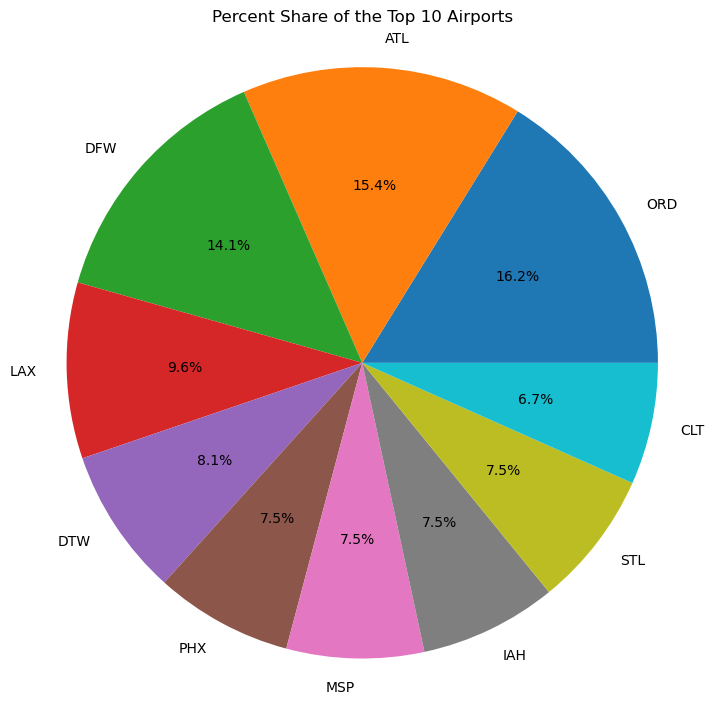

The above chart accounts for 31.73% of flights


In [67]:
numEntries = 10
shorteneda = destFlights.iloc[:numEntries]

plt.pie(shorteneda['Flights'], labels=shorteneda['Destination Airport'], autopct='%1.1f%%', radius=2)
plt.title(f"Percent Share of the Top {numEntries} Airports", y=1.4)
plt.show()

shortSum = shorteneda['Flights'].sum()
longSum = destFlights['Flights'].sum()
pctShown = round(((shortSum/longSum) * 100), 2)

print(f"The above chart accounts for {pctShown}% of flights")

#### Pie Chart With Orig Code

In [68]:
origFlights = df.groupby(['Origin Airport'])['Flights'].sum().reset_index()
origFlights.sort_values('Flights', inplace=True, ascending=False)
origFlights.head()

,Origin Airport,Flights
481,ORD,6908333
40,ATL,6557923
155,DFW,5994470
345,LAX,4099817
173,DTW,3452572


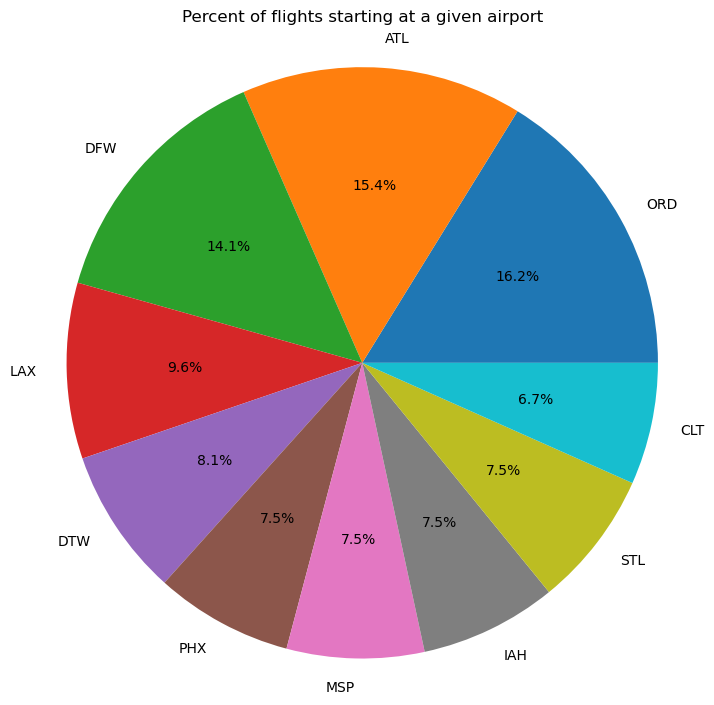

The above chart accounts for 31.77% of flights


In [69]:
numEntries = 10
shortenedb = origFlights.iloc[:numEntries]

plt.pie(shortenedb['Flights'], labels=shortenedb['Origin Airport'], autopct='%1.1f%%', radius=2)
plt.title("Percent of flights starting at a given airport", y=1.4)
plt.show()

shortSum = shortenedb['Flights'].sum()
longSum = origFlights['Flights'].sum()
pctShown = round(((shortSum/longSum) * 100), 2)

print(f"The above chart accounts for {pctShown}% of flights")

#### Percent Full vs Route Frequency

In [70]:
avgPctFull = df.groupby(['Origin Airport', 'Destination Airport'])['Percent Full'].mean().reset_index()
avgPctFull.head()

,Origin Airport,Destination Airport,Percent Full
0,1B1,BDL,0.120
1,ABE,ACT,0.000
2,ABE,ACY,0.710
3,ABE,ADS,NaN
4,ABE,AGS,0.875


In [71]:
fullFrame = pd.merge(uniqueRoutes, avgPctFull, on=['Origin Airport', 'Destination Airport'])
withNA = len(fullFrame)
fullFrame.dropna(inplace=True)
droppedNA = len(fullFrame)

print(f"There where {withNA - droppedNA} flights with NA values, assumed to be empty flights")

There where 5761 flights with NA values, assumed to be empty flights


In [72]:
test = df[df['Percent Full'] > 1]
print(f'There are {len(test)} instances of flights running over capacity')

There are 268 instances of flights running over capacity


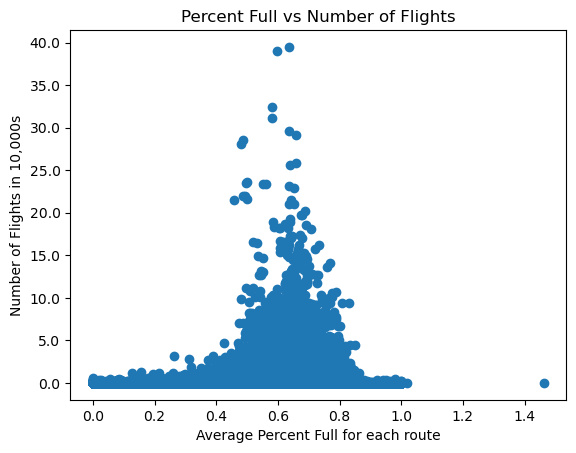

In [74]:
plt.scatter(fullFrame['Percent Full'], fullFrame['Flights'])
yfmt = tkr.FuncFormatter(numfmt)
plt.gca().yaxis.set_major_formatter(yfmt)
plt.ylabel('Number of Flights in 10,000s')
plt.xlabel('Average Percent Full for each route')
plt.title('Percent Full vs Number of Flights')
plt.show()

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(fullFrame['Flights'], fullFrame['Percent Full'])
print(pvalue)

print(f'p = {slope}f + {intercept}')

2.0538949477383423e-52
p = 1.496401907492728e-06f + 0.53154035577353


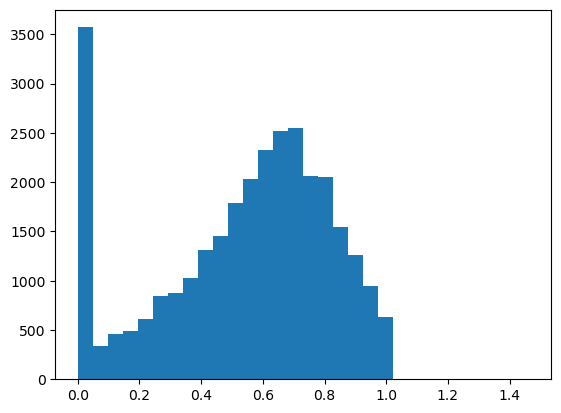

In [42]:
plt.hist(fullFrame[['Percent Full']], bins = 30)

plt.show()

#### Route Frequency vs Destination Population (E)

##### Shelved for now, running into odd issues with getting the population of the destination location

In [43]:
test = df[df['Destination Airport'] == 'TSS']
test.head()

,Origin Airport,Origin City,Origin Population,Destination Airport,Destination City,Destination Population,Distance,Flights,Passangers,Seats,Percent Full,Fly Date,Month,Year
1729950,JFK,"New York, NY",37180170,TSS,"New York, NY",37180170,11.0,1,0,0,NaN,200212,12,2002
1730052,JRB,"New York, NY",37180170,TSS,"New York, NY",37180170,22.0,12,0,0,NaN,200212,12,2002
1730130,WTC,"New York, NY",37180170,TSS,"New York, NY",37180170,22.0,1,0,0,NaN,200212,12,2002
1736786,JFK,"New York, NY",37342640,TSS,"New York, NY",37342640,11.0,6,0,0,NaN,200304,4,2003
1736832,JRB,"New York, NY",37342640,TSS,"New York, NY",37342640,22.0,7,0,0,NaN,200304,4,2003


In [44]:
df2 = df.copy()
oriDest = 'Origin'

portCode = f'{oriDest} Airport'
coi = f'{oriDest} Population'

codeLookup = df2[[portCode, coi]].drop_duplicates(keep='first')
codeLookup = codeLookup.groupby(portCode)[coi].mean().reset_index()
codeLookup

,Origin Airport,Origin Population
0,1B1,61618.000000
1,ABE,742874.400000
2,ABI,155009.650000
3,ABQ,724727.300000
4,ABR,39415.235294
...,...,...
678,YKM,218058.100000
679,YKN,21619.500000
680,YNG,596641.800000
681,YUM,149640.300000


In [45]:
#Column of interest will be abreviated to coi
dataOfInterest = pd.merge(uniqueRoutes, codeLookup, on=portCode)
dataOfInterest.tail()

,Origin Airport,Destination Airport,Flights,Origin Population
36444,YUM,YKM,1,149640.3
36445,ZZV,MCI,1,85031.8
36446,ZZV,PDK,5,85031.8
36447,ZZV,SHV,2,85031.8
36448,ZZV,YIP,3,85031.8


In [46]:
withNA = len(dataOfInterest)
dataOfInterest.dropna(inplace=True)
droppedNA = len(dataOfInterest)

#No NA values found, skipping print statement
#print(f"There where {withNA - droppedNA} flights with NA values, assumed to be empty flights")

In [47]:
#dataOfInterest[coi].max()
dataOfInterest.sort_values(coi, ascending=False, inplace=True)
dataOfInterest

,Origin Airport,Destination Airport,Flights,Origin Population
34719,TSS,JRA,2,37643011.75
34720,TSS,JRB,172,37643011.75
18269,JRB,BDR,66,37643011.75
18270,JRB,EWR,1642,37643011.75
18271,JRB,JFK,2792,37643011.75
...,...,...,...,...
35715,WFB,DQU,2999,13198.75
35716,WFB,JNU,12,13198.75
35717,WFB,KTN,11647,13198.75
35718,WFB,MTN,1,13198.75


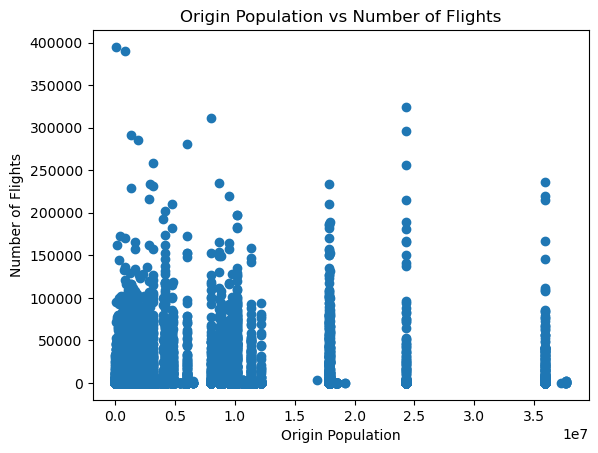

In [63]:
plt.scatter(dataOfInterest[coi], dataOfInterest['Flights'])
plt.ylabel('Number of Flights')
plt.xlabel(coi)
plt.title(f'{coi} vs Number of Flights')
plt.show()

#Change wording of axes and make it thousands rather than raw
#Change color of dots (teal? get hexcode/name)
#paleturqouise

#### Number of Passangers Flown per Year and Month Skipping, Amanda is doing something similar/more effective

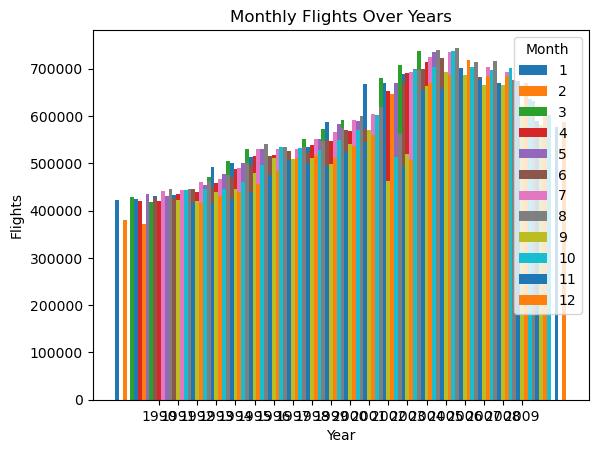

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Year': [2020, 2020, 2020, 2021, 2021, 2021],
    'Month': [1, 2, 1, 2, 1, 2],
    'Flights': [100, 120, 150, 110, 130, 160]
}

#df = pd.DataFrame(data)

# Create a pivot table by grouping and aggregating the data
pivot_df = df.pivot_table(index='Year', columns='Month', values='Flights', aggfunc='sum')

# Set the width and spacing for the bars
bar_width = 0.2  # Adjust the width as needed
spacing = 0.2   # Adjust the spacing between years as needed

# Plot the grouped bar chart
x = range(len(pivot_df.index))
for i, month in enumerate(pivot_df.columns):
    plt.bar([pos + i * (bar_width + spacing) for pos in x], pivot_df[month], width=bar_width, label=month)

# Set the labels and legend
plt.xlabel('Year')
plt.ylabel('Flights')
plt.title('Monthly Flights Over Years')
plt.xticks([pos + ((bar_width + spacing) * (len(pivot_df.columns) - 1) / 2) for pos in x], pivot_df.index)
plt.legend(title='Month')

# Show the chart
plt.show()

#### Big City Small City Correlation

In [11]:
destMed = df['Destination Population'].median()
origMed = df['Origin Population'].median()

destBins = [0, destMed, df['Destination Population'].max()]
origBins = [0, origMed, df['Origin Population'].max()]

glabels = ['Small City', 'Big City']

df['Origin Size'] = pd.cut(df['Origin Population'], origBins, labels=glabels)
df['Destination Size'] = pd.cut(df['Destination Population'], destBins, labels=glabels)


In [16]:
citySizeDf = df.groupby(['Origin Size', 'Destination Size'])['Flights'].sum().reset_index()

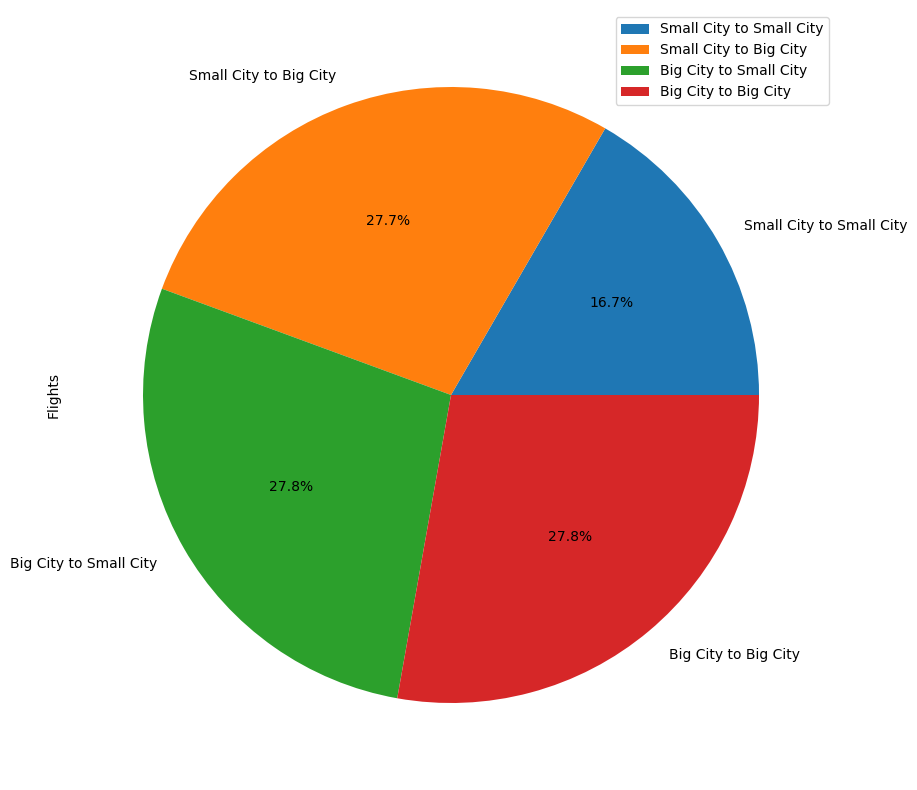

In [35]:
labels = []
for item, row in citySizeDf.iterrows():
    labels.append(row['Origin Size'] + " to " + row['Destination Size'])

citySizeDf.index = labels

citySizeDf.plot(kind='pie', y='Flights', figsize=(10 , 10), autopct= '%1.1f%%')
plt.show()

#### Correlation between route distance and route frequency

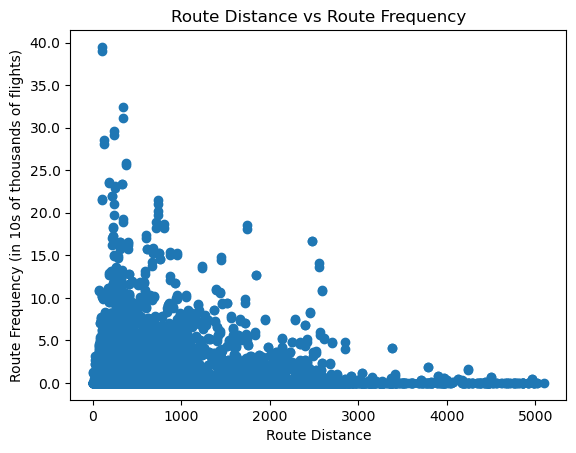

In [56]:
x = flightDF['Distance']
y = flightDF['Flights']

plt.scatter(x, y)
yfmt = tkr.FuncFormatter(numfmt)
plt.gca().yaxis.set_major_formatter(yfmt)
plt.title('Route Distance vs Route Frequency')
plt.xlabel('Route Distance')
plt.ylabel('Route Frequency (in 10s of thousands of flights)')
plt.show()

In [51]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
print(pvalue)

print(f'p = {slope}f + {intercept}')

2.2572578128349553e-34
p = -1.5371348339976227f + 4911.704502696499
